<a href="https://colab.research.google.com/github/hmblackwood/The-Good-Dog-Project/blob/main/The_Good_Dog_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🐕 The Good Dog Project 🦮

##Summary: I created a multi-class image classifier model with Tensorflow 2.0 to identify the breed of dog based on an image.

##1. Problem
Identify the breed of a dog based on an image.


##2. Data
The data is from the Dog Breed Indentification Completition on Kaggle.
https://www.kaggle.com/c/dog-breed-identification/data
Citation:
@misc{dog-breed-identification,
    author = {Will Cukierski},
    title = {Dog Breed Identification},
    year = {2017},
    howpublished = {\url{https://kaggle.com/competitions/dog-breed-identification}},
    note = {Kaggle}
}


##3. Evaluation
Model is evaluated on Multi Class Log Loss between the predicted probability and the obeserved target.
www.kaggle.com/competitions/dog-breed-identification/overview/evaluation


##4. Features
Information about the data:
- Unstructured data (images).
- 120 different classes, one for each breed of dog, into which images will be sorted.
- 10,000+ images of dogs in the training set, all of them labeled.
- 10,000+ images of dogs in the test set, all unlabeled. The model will be making predictions based on these.


In [2]:
# Import Tensorflow and Tensorflow Hub

import tensorflow as tf
print("TF version:", tf.__version__)
import tensorflow_hub as hub
print("TF Hub Version:", hub.__version__)

TF version: 2.17.1
TF Hub Version: 0.16.1


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


# Convert data into tensors

In [10]:
# View labels of my data
import pandas as pd
labels_csv = pd.read_csv("https://raw.githubusercontent.com/hmblackwood/The-Good-Dog-Project/refs/heads/main/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [11]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Exploration of the label file looks good, with 120 unique breeds and 10,222 labeled examples on which to train my model.

In [12]:
# How many images of each of the 120 breeds?
labels_csv["breed"].value_counts()

,count
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
brabancon_griffon,67
komondor,67


<function matplotlib.pyplot.show(close=None, block=None)>

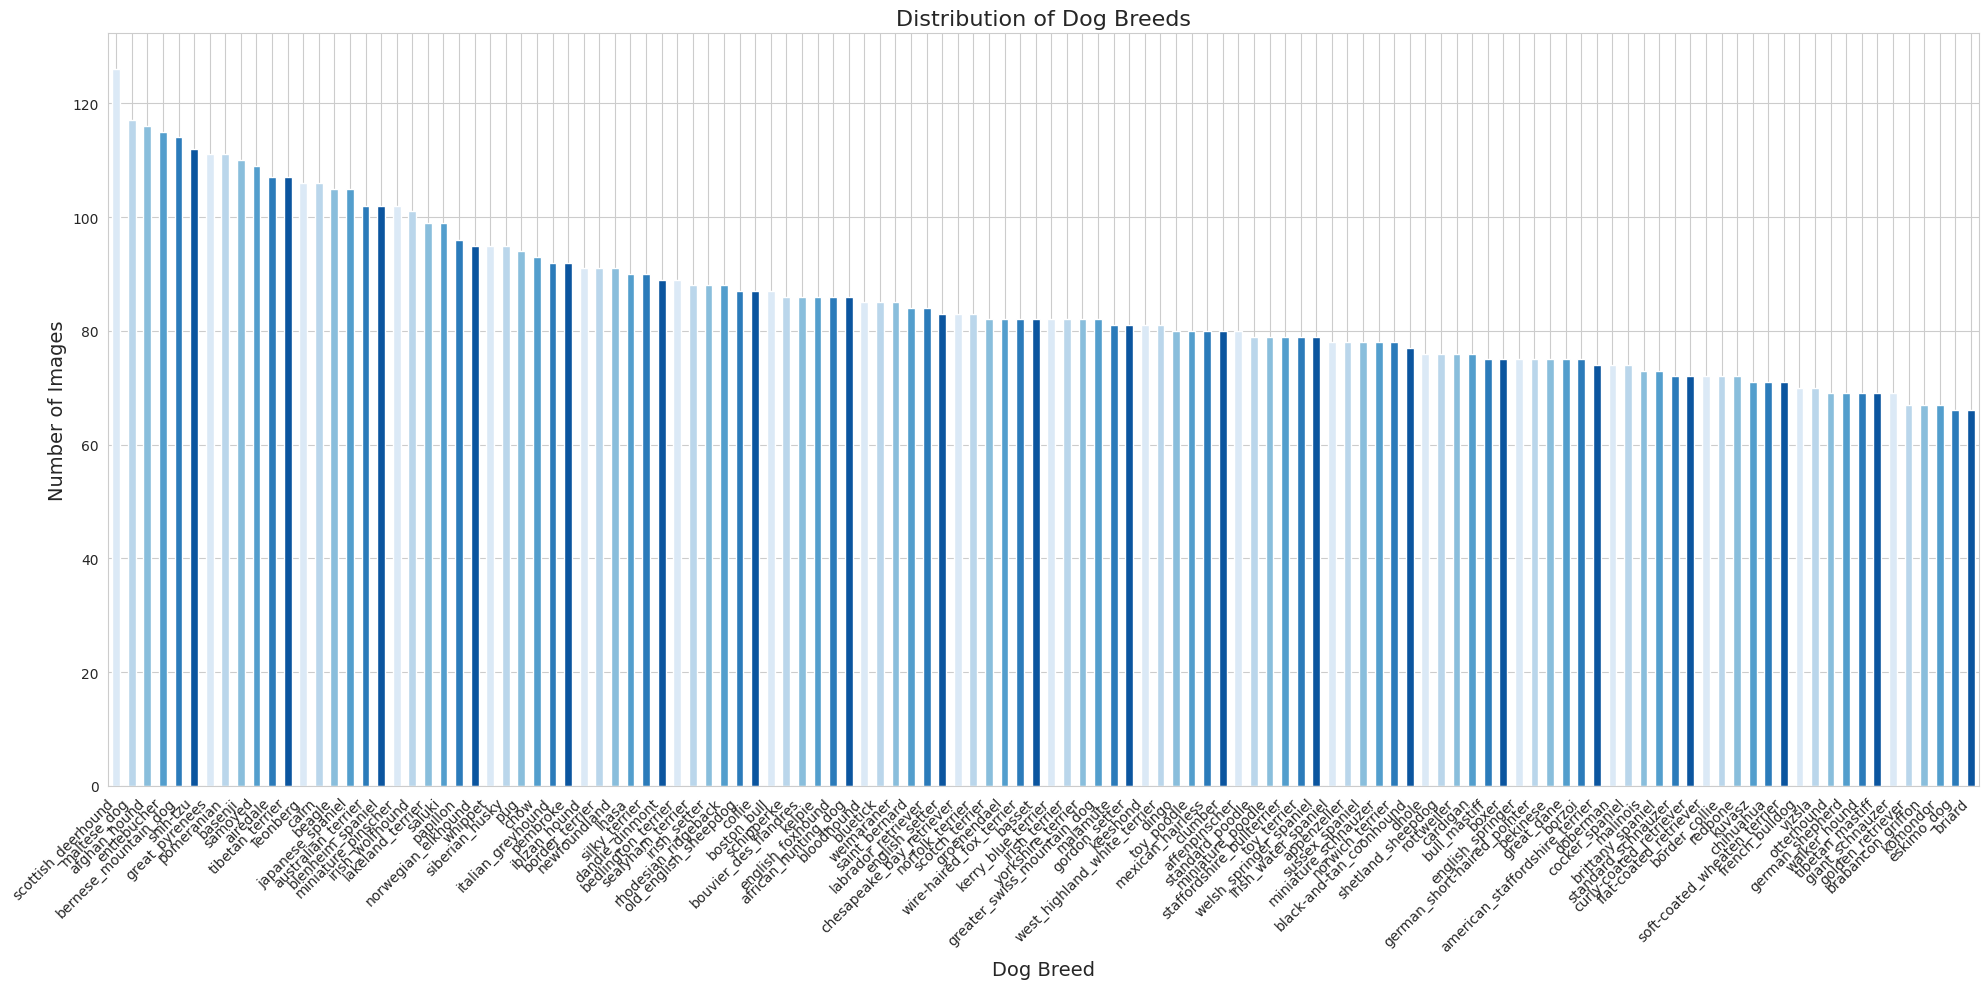

In [31]:
# I created a graph to display how many images of each breed I have.

breed_counts = labels_csv["breed"].value_counts()

# Set style and color pallette using Seaborn
sns.set_style("whitegrid")
sns.set_palette("Blues")

# Create bar chart
plt.figure(figsize=(20, 10))
breed_counts.plot(kind="bar", color=sns.color_palette())

# Label the chart for easier readability
plt.title("Distribution of Dog Breeds", fontsize=16)
plt.xlabel("Dog Breed", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout() # Fix layout so X axis labels don't overlap.


plt.show


In [32]:
# Calculate the median number of images per class
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# View an image from the test set
from Ipython.display import Image
Image("")